# STOCK TRADING DAYS OPEN PRICE
### AUTHOR : XXX
### DATE WRITTEN: dd-mm-yyyy
### 

In [0]:
# This model uses Ranbdom forest esembles to select the features
# and uses Adaboost to buid a ML model

In [0]:
import pandas as pd
import numpy as np

In [0]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

In [0]:
import warnings
warnings.filterwarnings("ignore")

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
es_train = pd.read_csv('/content/drive/My Drive/Data Science Classroom/dataset/ESCORTS_TRAIN.csv')
es_test = pd.read_csv('/content/drive/My Drive/Data Science Classroom/dataset/ESCORTS_TEST.csv')

In [0]:
es_train.head()

,Date,Adj Close,Volume,NIFTY Open,Stock Open price
0,4/1/2015,124.459732,650074.0,8483.700195,127.199997
1,4/6/2015,123.332298,352110.0,8615.799805,126.800003
2,4/7/2015,132.891037,2074275.0,8684.450195,136.800003
3,4/8/2015,136.224350,1811574.0,8698.950195,139.600006
4,4/9/2015,133.136139,596295.0,8756.200195,136.350006


In [0]:
es_train.isnull().sum()

Date                0
Adj Close           1
Volume              1
NIFTY Open          6
Stock Open price    2
dtype: int64

In [0]:
# display the record
es_train[es_train['Adj Close'].isnull()]

,Date,Adj Close,Volume,NIFTY Open,Stock Open price
1123,10/27/2019,NaN,NaN,NaN,644.0


In [0]:
es_train[es_train['Volume'].isnull()]

,Date,Adj Close,Volume,NIFTY Open,Stock Open price
1123,10/27/2019,NaN,NaN,NaN,644.0


In [0]:
es_train[es_train['NIFTY Open'].isnull()]

,Date,Adj Close,Volume,NIFTY Open,Stock Open price
7,4/15/2015,132.449860,525209.0,NaN,135.449997
185,1/1/2016,168.042999,335512.0,NaN,168.000000
337,8/12/2016,295.803101,6365901.0,NaN,300.799988
679,1/1/2018,769.035706,1246643.0,NaN,780.150024
925,1/1/2019,716.453003,3301665.0,NaN,721.500000
1123,10/27/2019,NaN,NaN,NaN,644.000000


In [0]:
es_train[es_train['Stock Open price'].isnull()]

,Date,Adj Close,Volume,NIFTY Open,Stock Open price
1122,10/25/2019,640.000000,1995407.0,11646.150390,NaN
1229,3/30/2020,601.599976,2084182.0,8385.950195,NaN


In [0]:
# stratagies to fill null values
es_train['Stock Open price'][es_train['Date'] == '10/25/2019'] = es_train['Stock Open price'][es_train['Date'] == '10/27/2019']
es_train['NIFTY Open'].fillna(es_train['NIFTY Open'].mean(),inplace=True)
es_train.dropna(axis=0,inplace=True)

In [0]:
es_train.isnull().sum()

Date                0
Adj Close           0
Volume              0
NIFTY Open          0
Stock Open price    0
dtype: int64

In [0]:
X = es_train[es_train.columns[1:-1]]
Y = es_train[es_train.columns[-1]]

In [0]:
es_test.dropna(axis=0,inplace=True)

In [0]:
X_test = es_test[es_test.columns[1:-1]]

In [0]:
# Create a list of feature names
feat_labels = list(es_train.axes[1])[1:-1]

In [0]:
# Create a random forest regressor
es_rf = RandomForestRegressor(n_estimators=10000, random_state=40, n_jobs=-1)

In [0]:
# Train the classifier
es_rf.fit(X, Y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10000, n_jobs=-1, oob_score=False,
                      random_state=40, verbose=0, warm_start=False)

In [0]:
# Print the name and gini importance of each feature
for feature in zip(feat_labels, es_rf.feature_importances_):
    print(feature)

('Adj Close', 0.9995597488826142)
('Volume', 9.615421063026653e-05)
('NIFTY Open', 0.00034409690675546586)


In [0]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.0003
sfm = SelectFromModel(es_rf, threshold=0.0003)

# Train the selector
sfm.fit(X, Y)

SelectFromModel(estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                                criterion='mse', max_depth=None,
                                                max_features='auto',
                                                max_leaf_nodes=None,
                                                max_samples=None,
                                                min_impurity_decrease=0.0,
                                                min_impurity_split=None,
                                                min_samples_leaf=1,
                                                min_samples_split=2,
                                                min_weight_fraction_leaf=0.0,
                                                n_estimators=10000, n_jobs=-1,
                                                oob_score=False,
                                                random_state=40, verbose=0,
                                                warm_

In [0]:
# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

Adj Close
NIFTY Open


In [0]:
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_important_train = sfm.transform(X)
X_important_test = sfm.transform(X_test)

In [0]:
# Create a new random forest classifier for the most important features
es_rf_imp = RandomForestRegressor(n_estimators=1000)

# Train the new classifier on the new dataset containing the most important features
es_rf_imp.fit(X_important_train, Y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [0]:
es_test.rename(columns = {'Stock Open price':'Actual Open'}, inplace=True)

In [0]:
es_rf_imp.score(X_important_test,es_test['Actual Open'])

0.8896920948773361

In [0]:
es_test['Predicted Open_rf_imp'] = es_rf_imp.predict(X_important_test)

In [0]:
# Mean squared error regression loss
from sklearn.metrics import mean_squared_error
mean_squared_error(es_test['Actual Open'], es_test['Predicted Open_rf_imp'],squared=True)

216.4029633443367

In [0]:
from sklearn.ensemble import AdaBoostRegressor
# Create a new random forest classifier for the most important features
es_ada_imp = AdaBoostRegressor(n_estimators=10000,learning_rate=0.01,loss='linear')

# Train the new classifier on the new dataset containing the most important features
es_ada_imp.fit(X_important_train, Y)

AdaBoostRegressor(base_estimator=None, learning_rate=0.01, loss='linear',
                  n_estimators=10000, random_state=None)

In [0]:
es_ada_imp.score(X_important_test,es_test['Actual Open'])

0.9161708972211111

In [0]:
es_test['Predicted Open_ada_imp'] = es_ada_imp.predict(X_important_test)

In [0]:
mean_squared_error(es_test['Actual Open'], es_test['Predicted Open_ada_imp'],squared=True)

164.45662924770122

In [0]:
# Parameter tuning
from sklearn.model_selection import GridSearchCV
params_grid = {'learning_rate':[0.01,0.02],
                'n_estimators': [1000,10000],
                'loss' : ['linear', 'square']}

In [0]:
model_opt = GridSearchCV(AdaBoostRegressor(), param_grid=params_grid)
model_opt.fit(X_important_train, Y)
model_opt.best_params_

{'learning_rate': 0.02, 'loss': 'square', 'n_estimators': 1000}

In [0]:
# Pipeline
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [0]:
es_pipe_ada = make_pipeline(StandardScaler(),
                    AdaBoostRegressor(**model_opt.best_params_))
es_pipe_ada.fit(X_important_train, Y)
es_pipe_ada.score(X_important_test,es_test['Actual Open'])

0.9112378384581793

In [0]:
es_test['Predicted Open_pipe_ada'] = es_pipe_ada.predict(X_important_test)

In [0]:
mean_squared_error(es_test['Actual Open'], es_test['Predicted Open_pipe_ada'],squared=True)

174.13434485170148

In [0]:
es_test.head(10)

,Date,Adj Close,Volume,NIFTY Open,Actual Open,Predicted Open_rf_imp,Predicted Open_ada_imp,Predicted Open_pipe_ada
0,4/1/2020,598.799988,4835985,8584.099609,594.000000,606.124496,614.809068,615.590553
1,4/3/2020,592.400024,3825217,8356.549805,623.000000,602.009399,614.487542,615.562280
2,4/7/2020,663.750000,4083879,8446.299805,653.700012,656.883158,643.590637,642.649152
3,4/8/2020,642.349976,4354813,8688.900391,661.000000,646.499001,643.260786,642.630278
4,4/9/2020,684.299988,3501448,8973.049805,684.299988,673.910848,685.427691,685.050319
5,4/13/2020,689.799988,2844324,9103.950195,706.250000,675.995397,685.621857,685.050319
6,4/15/2020,714.700012,6783089,9196.400391,710.000000,721.138802,721.578874,722.758210
7,4/16/2020,714.299988,3882012,8851.250000,744.000000,721.042502,721.578874,722.689898
8,4/17/2020,746.200012,5154012,9323.450195,749.450012,753.484604,730.304406,729.201945
9,4/20/2020,746.099976,2819316,9390.200195,725.049988,753.484604,730.304406,729.201945


Finally, How to explain the outcome of this model?

Compare the predicted outputs with actual

In [0]:
# plotting
import matplotlib.pyplot as plt

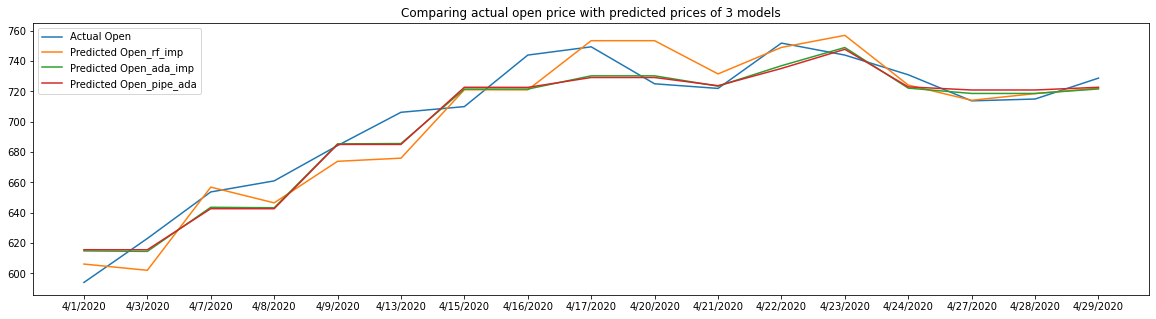

In [0]:
plt.figure(figsize=(20,5))
plt.plot(es_test['Date'],es_test['Actual Open'],label='Actual Open')
plt.plot(es_test['Date'],es_test['Predicted Open_rf_imp'],label='Predicted Open_rf_imp')
plt.plot(es_test['Date'],es_test['Predicted Open_ada_imp'],label='Predicted Open_ada_imp')
plt.plot(es_test['Date'],es_test['Predicted Open_pipe_ada'],label='Predicted Open_pipe_ada')
plt.legend()
plt.title("Comparing actual open price with predicted prices of 3 models")
plt.show()

In [0]:
# save the optimised model
#from joblib import dump, load
#dump(es_pipe_ada, 'escort_prediction.joblib')

## NEXT STEPS

### Try different algorithms, optimization methods to reduce the mean squared error to a value in the 100+ range

## Add following features
### Trading day's open price depends on the following:
### Previous day's US closing index (Nasdaq)
### Asian's markets open index (Nikkie 225, Shangai Composite, Hang Seng)
### Singapore NIFTY 50 index at the time Trading day start

## Deploy the model on trading platform to pick the opening price